In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
estimate = pd.read_csv('J:\\StrainStudy\\estimation\\Estimated Strain.csv')
def find_id(x):
    return int(x.split('_')[1])
def find_machine(x):
    if x.split('_')[2] == 'EPIQ7C':
        return 'Philips'
    return 'GE'
estimate['ID'] = estimate.Filenames.apply(find_id)
estimate['Machine'] = estimate.Filenames.apply(find_machine)

estimate['Value'] = (estimate.Strain-1)*100
print(estimate[estimate.Value<-40])
#estimate = estimate[estimate.Value>-40]

     Unnamed: 0                  Filenames    Strain  ID  Machine      Value
11           11   2PXH6QIR_2_EPIQ7C_NO.avi  0.324907   2  Philips -67.509312
47           47  3UCTV2X1_17_EPIQ7C_NO.avi  0.115374  17  Philips -88.462644
48           48  3UCTV3EU_17_EPIQ7C_NO.avi  0.432067  17  Philips -56.793272
84           84  3WNIQZH1_30_EPIQ7C_NO.avi  0.057015  30  Philips -94.298465
155         155  418WJ5JZ_44_EPIQ7C_NO.avi  0.043896  44  Philips -95.610393
158         158  418WNEXR_45_EPIQ7C_NO.avi  0.085721  45  Philips -91.427889


In [3]:
col_1 = estimate[estimate.Machine == 'Philips'][['ID','Value']]
col_1 = col_1.groupby("ID")['Value'].mean()
col_1 = col_1.rename('Philips')
#col_1 = col_1.drop('Value',axis = 1)
col_2 = estimate[estimate.Machine == 'GE'][['ID','Value']]
col_2 = col_2.groupby("ID")['Value'].mean()
col_2 = col_2.rename('GE')
#col_2 = col_2.drop('Value',axis = 1)
estimations = pd.DataFrame({'Philips':col_1,'GE':col_2})

In [4]:
estimations

,Philips,GE
ID,,
1,-24.251696,NaN
2,-44.951809,NaN
3,-21.363212,NaN
4,-23.966838,NaN
5,-23.157424,NaN
6,-25.847990,NaN
8,-19.080222,-20.019680
9,-24.480461,-20.087743
10,-22.778290,-25.418084


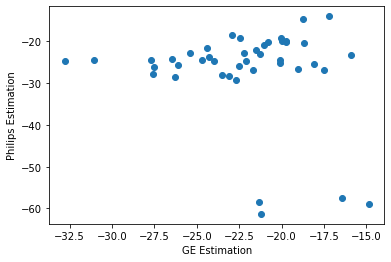

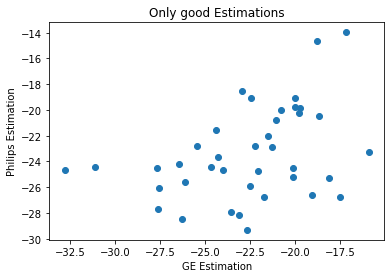

In [5]:
plt.scatter(estimations.GE,estimations.Philips)
plt.xlabel("GE Estimation")
plt.ylabel("Philips Estimation")
plt.show()
only_good_estimations = estimations[estimations.Philips>-40]
plt.title("Only good Estimations")
plt.scatter(only_good_estimations.GE,only_good_estimations.Philips)
plt.xlabel("GE Estimation")
plt.ylabel("Philips Estimation")
plt.show()

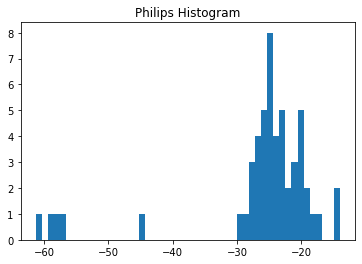

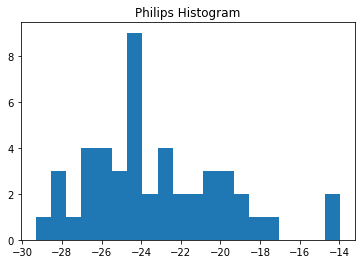

In [6]:
plt.hist(estimations.Philips,bins=50)
plt.title("Philips Histogram")
plt.show()
plt.hist(only_good_estimations.Philips,bins=20)
plt.title("Philips Histogram")
plt.show()

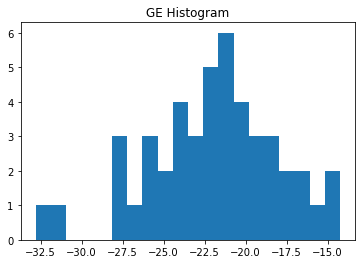

In [7]:
plt.hist(estimations.GE,bins=20)
plt.title("GE Histogram")
plt.show()

In [8]:
print("GE Count", len(estimations.GE.dropna()))
print("Philips Count", len(estimations.Philips.dropna()),"Good Philips Count", len(only_good_estimations.Philips.dropna()))
print("Matched Count",len(estimations.dropna()))

GE Count 46
Philips Count 52 Good Philips Count 47
Matched Count 43


In [9]:
measure = pd.read_csv('J:\\StrainStudy\\Measured_Values.csv').set_index("MRN")
measure.head()

,Philips 1,Philips 2,GE 1,GE 2
MRN,,,,
1,-15.3,-18.6,-13.0,-14.4
2,-22.7,-14.8,-17.8,-17.8
3,-19.1,-20.9,-15.9,-17.7
4,-24.2,-22.4,-17.9,-23.6
5,-18.1,-20.3,-17.8,-16.8


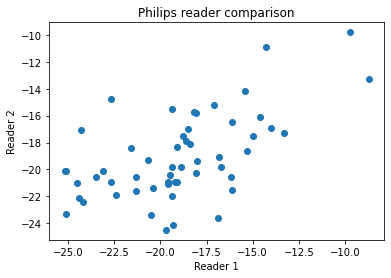

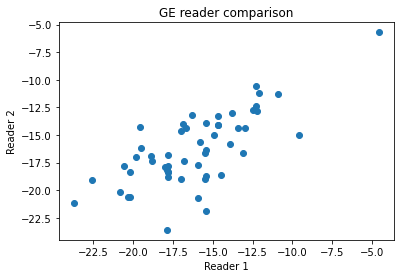

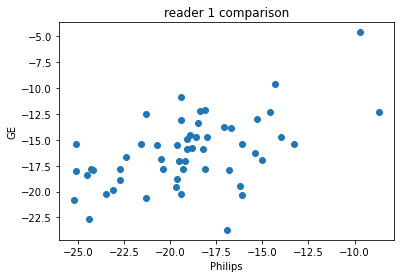

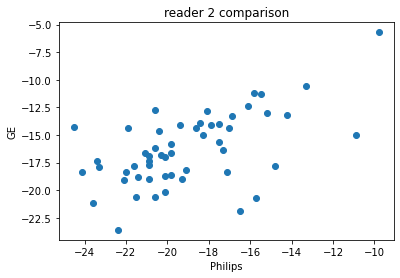

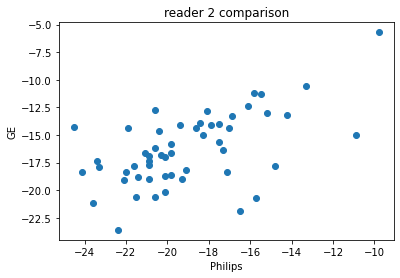

In [10]:
plt.scatter(measure['Philips 1'],measure['Philips 2'])
plt.xlabel("Reader 1")
plt.ylabel("Reader 2")
plt.title("Philips reader comparison")
plt.show()
plt.scatter(measure['GE 1'],measure['GE 2'])
plt.xlabel("Reader 1")
plt.ylabel("Reader 2")
plt.title("GE reader comparison")
plt.show()
plt.scatter(measure['Philips 1'],measure['GE 1'])
plt.xlabel("Philips")
plt.ylabel("GE")
plt.title("reader 1 comparison")
plt.show()
plt.scatter(measure['Philips 2'],measure['GE 2'])
plt.xlabel("Philips")
plt.ylabel("GE")
plt.title("reader 2 comparison")
plt.show()
plt.scatter(measure['Philips 2'],measure['GE 2'])
plt.xlabel("Philips")
plt.ylabel("GE")
plt.title("reader 2 comparison")
plt.show()

# for the serious comparison

In [11]:
total = measure.join(estimations)
total.tail()
def elim(num):
    if num<-40:
        return None
    return num
total.Philips = total.Philips.apply(elim)
total

,Philips 1,Philips 2,GE 1,GE 2,Philips,GE
MRN,,,,,,
1,-15.3,-18.6,-13.0,-14.4,-24.251696,NaN
2,-22.7,-14.8,-17.8,-17.8,NaN,NaN
3,-19.1,-20.9,-15.9,-17.7,-21.363212,NaN
4,-24.2,-22.4,-17.9,-23.6,-23.966838,NaN
5,-18.1,-20.3,-17.8,-16.8,-23.157424,NaN
6,-19.2,-20.9,-17.0,-19.0,-25.847990,NaN
7,-9.7,-9.8,-4.6,-5.7,NaN,NaN
8,-14.3,-10.9,-9.6,-15.0,-19.080222,-20.019680
9,-19.6,-20.9,-18.8,-17.4,-24.480461,-20.087743


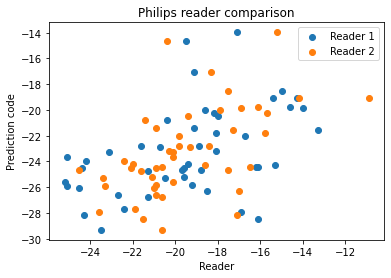

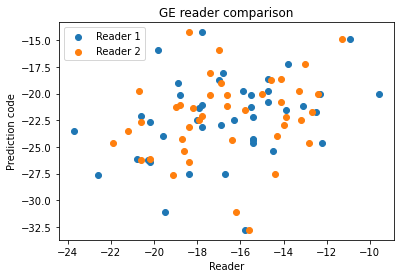

In [48]:
plt.scatter(total['Philips 1'],total['Philips'],label = 'Reader 1')
plt.xlabel("Reader")
plt.ylabel("Prediction code")
plt.title("Philips reader comparison")
plt.scatter(total['Philips 2'],total['Philips'],label='Reader 2')
plt.legend()
plt.show()
plt.scatter(total['GE 1'],total['GE'],label = 'Reader 1')
plt.xlabel("Reader")
plt.ylabel("Prediction code")
plt.title("GE reader comparison")
plt.scatter(total['GE 2'],total['GE'],label='Reader 2')
plt.legend()
plt.show()

In [13]:
shortcut = total[['Philips 1','Philips']].dropna()
print("Reader 1 Philips r value:", linregress(shortcut['Philips 1'],shortcut['Philips'])[2])
shortcut = total[['Philips 2','Philips']].dropna()
print("Reader 2 Philips r value:", linregress(shortcut['Philips 2'],shortcut['Philips'])[2])
shortcut = total[['GE 1','GE']].dropna()
print("Reader 1 GE r value:", linregress(shortcut['GE 1'],shortcut['GE'])[2])
shortcut = total[['GE 2','GE']].dropna()
print("Reader 2 GE r value:", linregress(shortcut['GE 2'],shortcut['GE'])[2])

Reader 1 Philips r value: 0.4585726861270755
Reader 2 Philips r value: 0.5336516884097132
Reader 1 GE r value: 0.3183793882467055
Reader 2 GE r value: 0.2392497379660879


In [27]:
shortcut = total[['Philips 1','Philips 2']].dropna()
print("Reader comparison Philips r value:", linregress(shortcut['Philips 1'],shortcut['Philips 2'])[2])
shortcut = total[['GE 1','GE 2']].dropna()
print("Reader comparison GE r value:", linregress(shortcut['GE 1'],shortcut['GE 2'])[2])

Reader comparison Philips r value: 0.5800621507858098
Reader comparison GE r value: 0.7230775663085316


In [28]:
total.describe()

,Philips 1,Philips 2,GE 1,GE 2,Philips,GE
count,54.000000,54.000000,54.000000,53.000000,46.000000,43.000000
mean,-19.038889,-19.072222,-16.190741,-16.296226,-23.225642,-22.316934
std,3.662426,3.134315,3.370587,3.275372,3.455325,3.893489
min,-25.200000,-24.500000,-23.700000,-23.600000,-29.319477,-32.795596
25%,-21.300000,-20.975000,-17.975000,-18.400000,-25.507734,-24.489904
50%,-19.150000,-19.800000,-16.100000,-16.600000,-24.088652,-22.076023
75%,-16.825000,-17.150000,-14.550000,-14.100000,-20.942109,-20.009840
max,-8.700000,-9.800000,-4.600000,-5.700000,-13.961590,-14.238209


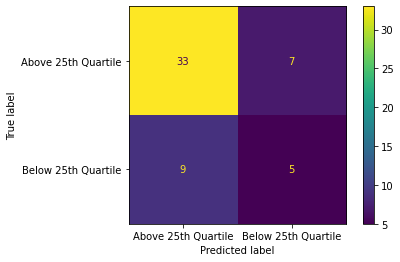

In [45]:
total['Predicted_Below'] = total['Philips']<-25.507734
total['Reader_2_Below'] = total['Philips 2']<-20.975000
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(total['Reader_2_Below'], total['Predicted_Below'],labels=['Reader 2','Model Prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Above 25th Quartile','Below 25th Quartile'])
disp.plot()

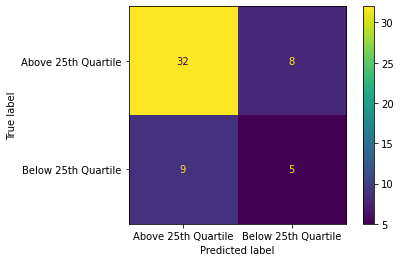

In [47]:
total['Reader_1_Below'] = total['Philips 1']<-21.300000
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(total['Reader_2_Below'], total['Reader_1_Below'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Above 25th Quartile','Below 25th Quartile'])
disp.plot()

In [31]:
sum(total['Comparison_2'])

14

# comparison with old calculation (without droping min/max)

In [24]:
old_estimate = pd.read_csv('J:\\StrainStudy\\estimation_old\\Estimated Strain.csv')
old_estimate['ID'] = old_estimate.Filenames.apply(find_id)
old_estimate['Machine'] = old_estimate.Filenames.apply(find_machine)

old_estimate['Value'] = (old_estimate.Strain-1)*100
print(old_estimate[old_estimate.Value<-40])
#estimate = estimate[estimate.Value>-40]
old_col_1 = old_estimate[old_estimate.Machine == 'Philips'][['ID','Value']]
old_col_1 = old_col_1.groupby("ID")['Value'].mean()
old_col_1 = old_col_1.rename('Philips')
#col_1 = col_1.drop('Value',axis = 1)
old_col_2 = old_estimate[old_estimate.Machine == 'GE'][['ID','Value']]
old_col_2 = old_col_2.groupby("ID")['Value'].mean()
old_col_2 = old_col_2.rename('GE')
#col_2 = col_2.drop('Value',axis = 1)
old_estimations = pd.DataFrame({'Philips':old_col_1,'GE':old_col_2})

     Unnamed: 0                  Filenames    Strain  ID  Machine      Value
7             7   2PXH1X7N_4_EPIQ7C_NO.avi  0.599191   4  Philips -40.080861
11           11   2PXH6QIR_2_EPIQ7C_NO.avi  0.381273   2  Philips -61.872715
47           47  3UCTV2X1_17_EPIQ7C_NO.avi  0.122384  17  Philips -87.761622
48           48  3UCTV3EU_17_EPIQ7C_NO.avi  0.420011  17  Philips -57.998856
84           84  3WNIQZH1_30_EPIQ7C_NO.avi  0.228681  30  Philips -77.131924
155         155  418WJ5JZ_44_EPIQ7C_NO.avi  0.044031  44  Philips -95.596926
157         157   418WJK2Q_44_VividE95.avi  0.598498  44       GE -40.150176
158         158  418WNEXR_45_EPIQ7C_NO.avi  0.239209  45  Philips -76.079119


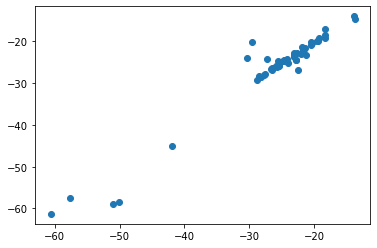

In [26]:
plt.scatter(old_estimations['Philips'],estimations['Philips'])
